In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import color
from skimage import io
from sklearn.decomposition import NMF

In [ ]:
image = io.imread('photo.jpg')


In [ ]:
gray_image = color.rgb2gray(image)

In [ ]:
gray_image

array([[0.04614314, 0.04614314, 0.04222157, ..., 0.65419451, 0.65811608,
        0.65811608],
       [0.04417098, 0.04614314, 0.04417098, ..., 0.65419451, 0.65419451,
        0.65419451],
       [0.04500431, 0.04809255, 0.04668588, ..., 0.65419451, 0.65027294,
        0.65027294],
       ...,
       [0.15994314, 0.1691851 , 0.16526353, ..., 0.7277949 , 0.73171647,
        0.73563804],
       [0.1521149 , 0.16387961, 0.15436196, ..., 0.7277949 , 0.73171647,
        0.73563804],
       [0.14427176, 0.15603647, 0.14651882, ..., 0.7277949 , 0.73171647,
        0.73955961]])

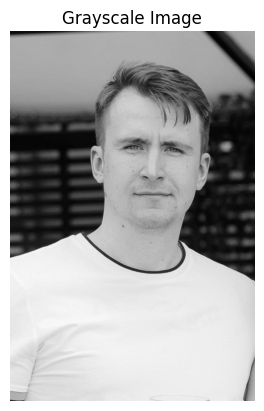

In [ ]:
plt.imshow(gray_image, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')
plt.show()

In [ ]:
h, w = gray_image.shape
gray_image_flattened = gray_image.reshape(h, w)

In [ ]:
k = 10
nmf_model = NMF(n_components=k, init='random', random_state=42)
W = nmf_model.fit_transform(gray_image_flattened)
H = nmf_model.components_

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


In [ ]:
# Reconstruct the image using the two matrices W and H
low_rank_image = np.dot(W, H).reshape(h, w)



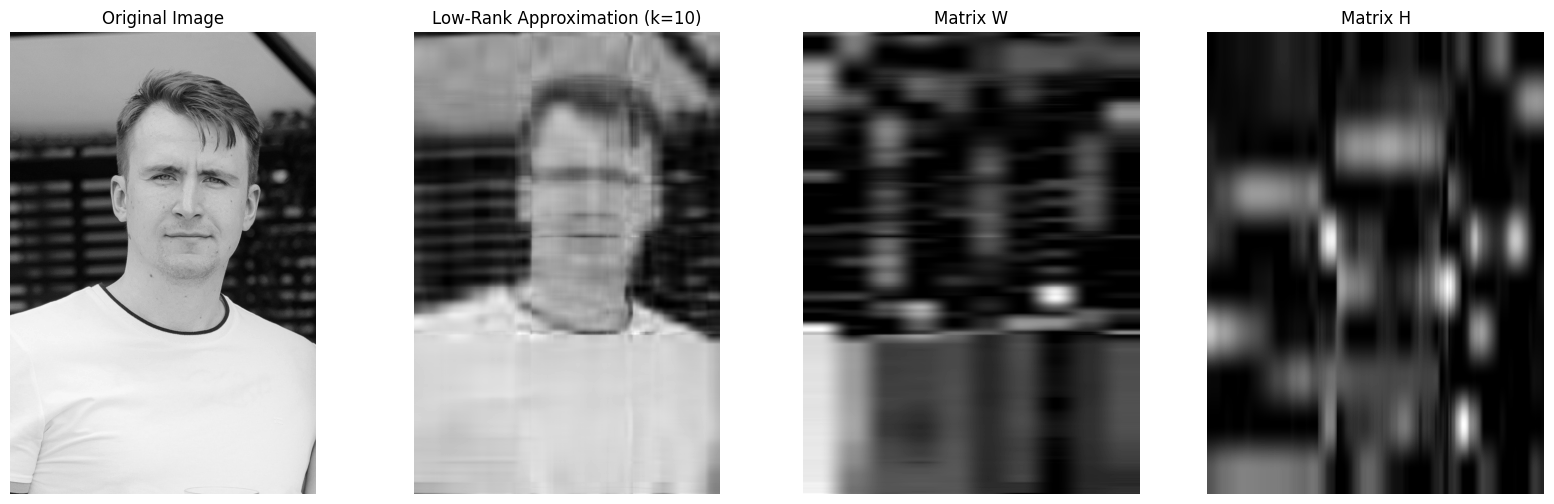

In [ ]:
# Plot the original, low-rank approximation and the two matrices
fig, ax = plt.subplots(1, 4, figsize=(20, 6))

ax[0].imshow(gray_image, cmap='gray')
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(low_rank_image, cmap='gray')
ax[1].set_title(f'Low-Rank Approximation (k={k})')
ax[1].axis('off')

ax[2].imshow(W, aspect='auto', cmap='gray')
ax[2].set_title('Matrix W')
ax[2].axis('off')

ax[3].imshow(H, aspect='auto', cmap='gray')
ax[3].set_title('Matrix H')
ax[3].axis('off')

plt.show()

In [ ]:
import pandas as pd
from lightfm import LightFM
from lightfm.data import Dataset
import numpy as np


In [ ]:
data = pd.read_csv('ratings.csv')

In [ ]:
len(data['movieId'].unique())

9724

In [ ]:
dataset = Dataset()
dataset.fit(data['userId'], data['movieId'])



In [ ]:
(interactions, weights) = dataset.build_interactions(
    ((row['userId'], row['movieId'], row['rating']) for index, row in data.iterrows())
)



In [ ]:
print(weights)

  (0, 0)	4.0
  (0, 1)	4.0
  (0, 2)	4.0
  (0, 3)	5.0
  (0, 4)	5.0
  (0, 5)	3.0
  (0, 6)	5.0
  (0, 7)	4.0
  (0, 8)	5.0
  (0, 9)	5.0
  (0, 10)	5.0
  (0, 11)	5.0
  (0, 12)	3.0
  (0, 13)	5.0
  (0, 14)	4.0
  (0, 15)	5.0
  (0, 16)	3.0
  (0, 17)	3.0
  (0, 18)	5.0
  (0, 19)	4.0
  (0, 20)	4.0
  (0, 21)	5.0
  (0, 22)	4.0
  (0, 23)	3.0
  (0, 24)	4.0
  :	:
  (609, 4821)	5.0
  (609, 6583)	4.5
  (609, 4001)	4.0
  (609, 1383)	5.0
  (609, 9718)	3.5
  (609, 1089)	3.5
  (609, 8048)	3.0
  (609, 1385)	3.0
  (609, 4610)	3.0
  (609, 9719)	2.5
  (609, 9720)	4.5
  (609, 8649)	3.0
  (609, 9721)	3.0
  (609, 1387)	4.0
  (609, 4827)	4.0
  (609, 1388)	3.5
  (609, 9722)	3.5
  (609, 9723)	3.5
  (609, 1390)	5.0
  (609, 1091)	4.0
  (609, 3120)	4.0
  (609, 2035)	5.0
  (609, 3121)	5.0
  (609, 1392)	5.0
  (609, 2873)	3.0


In [ ]:
model = LightFM(loss='warp')
model.fit(weights, epochs=30, num_threads=2)

In [ ]:
def sample_recommendation(model, data, user_ids):
    n_users, n_items = data.shape

    for user_id in user_ids:
        scores = model.predict(user_id, np.arange(n_items))
        top_items = np.argsort(-scores)[:10]

        print(f'Recommendations for user {user_id}:')
        for x in top_items:
            print(f'    {x}')

sample_recommendation(model, interactions, [1])

Recommendations for user 1:
    244
    238
    915
    1054
    20
    774
    240
    166
    242
    192


In [ ]:
def sample_recommendation(model, data, user_ids):
    n_users, n_items = data.shape

    for user_id in user_ids:
        scores = model.predict(user_id, np.arange(n_items))
        top_items = np.argsort(-scores)[:10]

        print(f'Recommendations for user {user_id}:')
        for x in top_items:
            print(f'    {x}')

sample_recommendation(model, interactions, [1])

Recommendations for user 1:
    244
    238
    251
    915
    240
    926
    249
    166
    253
    1054
